# 분류 신경망 빌딩 연습

In [ ]:
# 모형 저장 및 불러오는 코드

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [4]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [5]:
# data load

from sklearn import datasets
raw_wine = datasets.load_wine()

# feature and target

In [6]:
X = raw_wine.data
y = raw_wine.target

## feature dimension 

In [7]:
print(X.shape)

(178, 13)


## target data classes

In [8]:
print(set(y))

{0, 1, 2}


## target data one-hot encoding (오류 및 해결 포함)

타깃 데이터는 범주형 데이터이기 때문에(0, 1, 2로 표현됨) 원핫인코딩을 진행하도록 한다.

In [9]:
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

```
AlreadyExistsError: Another metric with the same name already exists.
```

해당 오류가 뜨면 keras를 하나만 설치하라는 의미라고 한다. (https://precommer.tistory.com/76

나는 가상환경을 사용하고 있는 상황이라 혹시나 해서 base에 있는 keras도 지워보고 다시 깔았지만 다시 문제가 생겼다.


```
ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/tensorflow/_api/v2/compat/v2/experimental/__init__.py)
```

그 다음에는 텐서플로우와 케라스 버전이 안맞는다는 이야기를 받았다. ~~젠장.~~ (https://stackoverflow.com/questions/72255562/cannot-import-name-dtensor-from-tensorflow-compat-v2-experimental)

둘다 지우고 다시 깔도록 한다. 이번 오류 덕분에 모싄뤄닝등을 할 때는 버전 체크가 더더욱이 중요하다는 것을, 까먹었었던 바보를 발견하였다.

## Training/Test Data split

In [10]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# Building Perceptron (오류 및 해결 포함)

In [11]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 3개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 3개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

2022-06-21 21:02:30.245160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## perceptron model structure checking

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________

빌딩하고 났더니 무슨 오류가 떴는데 모델 요약은 적절하게 되었다. 이를 해결하기 위해서는 

(https://stackoverflow.com/questions/66092421/how-to-rebuild-tensorflow-with-the-compiler-flags)
```
 import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
```

하라고 해서 해보고 진행했더니 하단처럼, 오류가 뜨지 않았다.

대신 모델 버전이 다르다. 알아서 새로 만들었나보다.

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [14]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 3개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 3개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

## model compile

In [16]:
model.compile(loss = 'categorical_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

## model learning

In [17]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
27/27 [==============================] - 1s 2ms/step - loss: 1.1806 - accuracy: 0.3835
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.9840 - accuracy: 0.4887
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8874 - accuracy: 0.5639
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.8216 - accuracy: 0.6316
Epoch 5/30
27/27 [==============================] - 0s 5ms/step - loss: 0.7804 - accuracy: 0.6391
Epoch 6/30
27/27 [==============================] - 0s 7ms/step - loss: 0.7955 - accuracy: 0.6165
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.6015
Epoch 8/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7764 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.5789
Epoch 11/30
27/27 [

# evaluation

In [18]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8947
0.8947368264198303
2/2 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8444
0.8444444537162781


## accuracy and loss rate

In [20]:
import numpy as np
epoch = np.arange(1, epo +1)            # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [21]:
accuracy = hist.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(accuracy)

[0.3834586441516876, 0.4887218177318573, 0.5639097690582275, 0.6315789222717285, 0.6390977501869202, 0.61654132604599, 0.6015037298202515, 0.6240601539611816, 0.5939849615097046, 0.5789473652839661, 0.6842105388641357, 0.6315789222717285, 0.7293233275413513, 0.7593985199928284, 0.8195488452911377, 0.7819548845291138, 0.7744361162185669, 0.7969924807548523, 0.7368420958518982, 0.8270676732063293, 0.8571428656578064, 0.8571428656578064, 0.8796992301940918, 0.8496240377426147, 0.902255654335022, 0.8646616339683533, 0.9097744226455688, 0.8872180581092834, 0.8571428656578064, 0.8947368264198303]


In [22]:
loss = hist.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[1.1806256771087646, 0.9840450286865234, 0.8874258995056152, 0.8215858340263367, 0.7804238200187683, 0.7955265641212463, 0.8407451510429382, 0.7764018774032593, 0.7720502018928528, 0.7383018732070923, 0.7047501802444458, 0.6818320751190186, 0.6537955403327942, 0.6523193120956421, 0.6145582795143127, 0.5937239527702332, 0.5843676924705505, 0.6010271310806274, 0.6729430556297302, 0.5458195805549622, 0.5104205012321472, 0.49134647846221924, 0.4004116654396057, 0.4903406798839569, 0.43365421891212463, 0.4087701737880707, 0.35980093479156494, 0.36456674337387085, 0.3540925979614258, 0.3685899078845978]


## accuracy and loss rate visualization

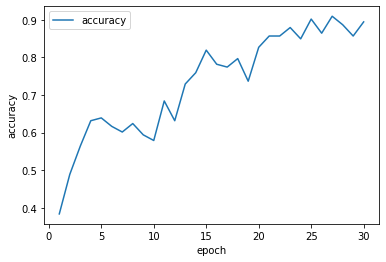

In [23]:
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

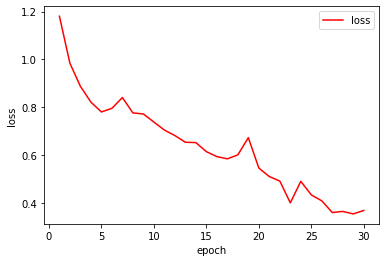

In [24]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()